# API BNDMET

In [107]:
import requests

# Base URL da API
BASE_URL = 'https://api-bndmet.decea.mil.br/v1/estacoes'

# Cabeçalhos necessários para a requisição
headers = {
    'accept': 'application/json',
    'x-api-key': '6cqZrWP34P5hE5HVKQvhVRwqagdwIz7i'
}

# def make_request(url, params=None):
#     """Função auxiliar para fazer a requisição GET e retornar a resposta."""
#     response = requests.get(url, headers=headers, params=params)
#     if response.status_code == 200:
#         return response.json()
#     else:
#         raise Exception(f"Erro {response.status_code}: {response.text}")

import logging

# Set up the logging configuration to write errors to a file
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

def make_request(url, params=None):
    """Function to make the GET request and return the response, with error handling."""
    try:
        # Send the GET request
        response = requests.get(url, headers=headers, params=params)
        
        # Check if the status code is OK (200)
        if response.status_code == 200:
            return response.json()
        else:
            # Log the error if the status code is not 200
            error_message = f"Erro {response.status_code}: {response.text}"
            logging.error(f"Request failed for URL: {url} with params: {params}. {error_message}")
            return None  # Return None if the request fails
    except requests.exceptions.RequestException as e:
        # Catch any request-related errors (e.g., connection error, timeout, etc.)
        logging.error(f"Request failed for URL: {url} with params: {params}. Error: {str(e)}")
        return None  # Return None if the request fails due to an exception




def get_estacoes(tipo='todas', regiao=None, estado=None):
    """Obter todas as estações disponíveis."""
    params = {'tipo': tipo}
    if regiao:
        params['regiao'] = regiao
    if estado:
        params['estado'] = estado
    
    url = BASE_URL
    return make_request(url, params)

def get_estacao_atributos(cod_estacao, periodo='horario', agrupar_por='intervalo'):
    """Obter lista de atributos de uma estação específica."""
    url = f'{BASE_URL}/{cod_estacao}/atributos'
    params = {'periodo': periodo, 'agruparPor': agrupar_por}
    return make_request(url, params)

def get_fenomeno(cod_estacao, cod_fenomeno, data_inicio, data_final):
    """Obter medição de um fenômeno específico."""
    url = f'{BASE_URL}/{cod_estacao}/fenomenos/{cod_fenomeno}'
    params = {'dataInicio': data_inicio, 'dataFinal': data_final}
    return make_request(url, params)

def comparar_estacoes_atributos(cod_estacoes, periodo='horario', agrupar_por='classe'):
    """Obter atributos comuns entre um grupo de estações."""
    url = f'{BASE_URL}/comparar/atributos'
    params = {'codEstacoes': ','.join(cod_estacoes), 'periodo': periodo, 'agruparPor': agrupar_por}
    return make_request(url, params)

# Testes
if __name__ == '__main__':
    try:
        # Testando o método GET /estacoes
        print("Testando GET /estacoes")
        estacoes = get_estacoes(tipo='todas', regiao='SE')
        print(estacoes)
        
        # Testando o método GET /estacoes/{codEstacao}/atributos
        print("\nTestando GET /estacoes/{codEstacao}/atributos")
        atributos = get_estacao_atributos(cod_estacao='A657', periodo='horario', agrupar_por='intervalo')
        print(atributos)
        
        # Testando o método GET /estacoes/{codEstacao}/fenomenos/{codFenomeno}
        print("\nTestando GET /estacoes/{codEstacao}/fenomenos/{codFenomeno}")
        fenomeno = get_fenomeno(cod_estacao='A657', cod_fenomeno='I175', data_inicio='2008-01-01', data_final='2008-01-30')
        print(fenomeno)
        
        # Testando o método GET /estacoes/comparar/atributos
        print("\nTestando GET /estacoes/comparar/atributos")
        comparar = comparar_estacoes_atributos(cod_estacoes=['A657', 'A541'], periodo='horario', agrupar_por='classe')
        print(comparar)
    
    except Exception as e:
        print(f"Ocorreu um erro: {e}")


Testando GET /estacoes
{'query': {'regiao': 'SE', 'tipo': 'todas'}, 'params': {}, 'data': [{'codEstacao': 'A657', 'nome': 'AFONSO CLAUDIO', 'situacao': 'Operante', 'tipo': 'Automatica', 'estado': 'ES', 'latitude': '-20.10416666', 'longitude': '-41.10694444', 'altitudeEmMetros': '507.48', 'entidadeResponsavel': 'INMET', 'dataInicioOperacao': '2011-09-23T21:00:00.000-03:00', 'dataFimOperacao': None, 'codOscar': '0-2000-0-86827', 'codWsi': '0-76-0-3200102000000478'}, {'codEstacao': 'D6607', 'nome': 'AGRESTE', 'situacao': 'Operante', 'tipo': 'Automatica', 'estado': 'MG', 'latitude': '-15.9408', 'longitude': '-43.6419', 'altitudeEmMetros': '498', 'entidadeResponsavel': 'ANA', 'dataInicioOperacao': '2021-12-31T21:00:00.000-03:00', 'dataFimOperacao': None, 'codOscar': None, 'codWsi': '0-76-4-44637900'}, {'codEstacao': 'D6914', 'nome': 'AGROPECUARIA VALE VERDE', 'situacao': 'Operante', 'tipo': 'Automatica', 'estado': 'MG', 'latitude': '-16.6853', 'longitude': '-47.1992', 'altitudeEmMetros': '0

In [91]:
import pandas as pd

# Getting the station data for each state
estacoes_SP = get_estacoes(tipo='todas', estado='SP')
estacoes_MG = get_estacoes(tipo='todas', estado='MG')
estacoes_RJ = get_estacoes(tipo='todas', estado='RJ')
estacoes_SC = get_estacoes(tipo='todas', estado='SC')
estacoes_PR = get_estacoes(tipo='todas', estado='PR')
estacoes_GO = get_estacoes(tipo='todas', estado='GO')
estacoes_MS = get_estacoes(tipo='todas', estado='MS')

# Convert each state's data to DataFrames
df_SP = pd.DataFrame(estacoes_SP['data'])
df_MG = pd.DataFrame(estacoes_MG['data'])
df_RJ = pd.DataFrame(estacoes_RJ['data'])
df_SC = pd.DataFrame(estacoes_SC['data'])
df_PR = pd.DataFrame(estacoes_PR['data'])
df_GO = pd.DataFrame(estacoes_GO['data'])
df_MS = pd.DataFrame(estacoes_MS['data'])

# Concatenate all DataFrames into one
df_all_estacoes = pd.concat([df_SP, df_MG, df_RJ, df_SC, df_PR, df_GO, df_MS], ignore_index=True)

# Display the combined DataFrame
df_all_estacoes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codEstacao           1923 non-null   object
 1   nome                 1923 non-null   object
 2   situacao             1923 non-null   object
 3   tipo                 1923 non-null   object
 4   estado               1923 non-null   object
 5   latitude             1923 non-null   object
 6   longitude            1923 non-null   object
 7   altitudeEmMetros     1923 non-null   object
 8   entidadeResponsavel  1923 non-null   object
 9   dataInicioOperacao   1891 non-null   object
 10  dataFimOperacao      323 non-null    object
 11  codOscar             651 non-null    object
 12  codWsi               1923 non-null   object
dtypes: object(13)
memory usage: 195.4+ KB


In [92]:
df_all_estacoes = df_all_estacoes[( (df_all_estacoes['dataFimOperacao'] >= '2008-01-01') | (df_all_estacoes['dataFimOperacao'].isna()) )]
df_all_estacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1705 entries, 0 to 1922
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codEstacao           1705 non-null   object
 1   nome                 1705 non-null   object
 2   situacao             1705 non-null   object
 3   tipo                 1705 non-null   object
 4   estado               1705 non-null   object
 5   latitude             1705 non-null   object
 6   longitude            1705 non-null   object
 7   altitudeEmMetros     1705 non-null   object
 8   entidadeResponsavel  1705 non-null   object
 9   dataInicioOperacao   1675 non-null   object
 10  dataFimOperacao      105 non-null    object
 11  codOscar             436 non-null    object
 12  codWsi               1705 non-null   object
dtypes: object(13)
memory usage: 186.5+ KB


In [93]:
df_all_estacoes.head()

,codEstacao,nome,situacao,tipo,estado,latitude,longitude,altitudeEmMetros,entidadeResponsavel,dataInicioOperacao,dataFimOperacao,codOscar,codWsi
0,A736,ARIRANHA,Operante,Automatica,SP,-21.13305554,-48.84055555,525.44,INMET,2007-11-12T21:00:00.000-03:00,None,0-2000-0-86841,0-76-0-3503703000000271
1,A725,AVARE,Operante,Automatica,SP,-23.10166666,-48.9411111,776.36,INMET,2006-09-21T21:00:00.000-03:00,None,0-2000-0-86904,0-76-0-3504503000000107
2,A741,BARRA BONITA,Operante,Automatica,SP,-22.4711111,-48.5575,533.68,INMET,2008-04-23T21:00:00.000-03:00,None,0-2000-0-86867,0-76-0-3505302000000348
3,D7117,BARRA DO ACUNGUI,Operante,Automatica,SP,-24.2064,-47.6133,22,ANA,2021-12-31T21:00:00.000-03:00,None,None,0-76-4-81530000
4,D7070,BARRA DO AZEITE - PCD,Operante,Automatica,SP,-24.8003,-48.1736,0,ANA,2021-12-31T21:00:00.000-03:00,None,None,0-76-4-81699000


In [94]:
# Convert latitude and longitude to float
df_all_estacoes['latitude'] = pd.to_numeric(df_all_estacoes['latitude'], errors='coerce')
df_all_estacoes['longitude'] = pd.to_numeric(df_all_estacoes['longitude'], errors='coerce')

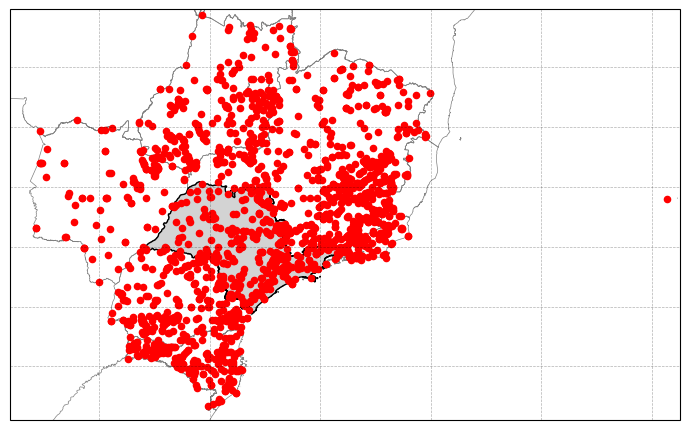

In [95]:
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

def plot_station_locations_all(filtered_df_stations, years, ncols=4):
    """
    Plots station locations for given years in a grid of subplots and saves the entire figure as a PDF file.

    Parameters:
    filtered_df_stations (pd.DataFrame): DataFrame containing the stations data.
    years (list or range): List or range of years to plot.
    ncols (int): Number of columns in the subplot grid (default is 3).

    Returns:
    None
    """
    
    # Calculate global min/max for LATITUDE and LONGITUDE for consistent axis limits
    nx = 0.02
    min_lon = filtered_df_stations['longitude'].min()*(1 + nx)
    max_lon = filtered_df_stations['longitude'].max()*(1 - nx)
    min_lat = filtered_df_stations['latitude'].min()*(1 + nx)
    max_lat = filtered_df_stations['latitude'].max()*(1 - nx)

    # Load the state shape for São Paulo
    gdf = geobr.read_state()
    gdf_sp = gdf[gdf['abbrev_state'] == 'SP']

    # Calculate the number of rows for the subplot grid
    nrows = (len(years) // ncols) + (1 if len(years) % ncols != 0 else 0)

    # Create the main figure for all subplots
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), subplot_kw={'projection': ccrs.PlateCarree()})
    

    # Filter the dataframe for the current year
    
    # Plot the São Paulo state boundary
    gdf.plot(ax=ax, color='none', edgecolor='gray', linewidth=0.5)
    gdf_sp.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=1)
            
    # Plot the station locations as a scatter plot
    ax.scatter(
        filtered_df_stations['longitude'], 
        filtered_df_stations['latitude'], 
        color='red', 
        s=20, 
    )
            
    # Set axis limits based on the global min/max
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    
    # Add gridlines
    ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.3, linestyle='--')
        
       # Adjust layout
    plt.tight_layout()

      
# Example of how to call the function
years = range(2008, 2024)
plot_station_locations_all(df_all_estacoes, years)

In [96]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
from shapely.geometry import Point
import numpy as np

shape = gpd.read_file('../data/raw/shapefiles/SP.shp')

shapeM = gpd.read_file('../data/raw/shapefiles/SP_Municipios_2022.shp')
LON = shapeM['xcentroide'].values
LAT = shapeM['ycentroide'].values
points_centroids = list()
for j in range(len(LON)):
    point_centroids = Point(LON[j], LAT[j])
    points_centroids.append(point_centroids)
    gdf_centroids = gpd.GeoDataFrame(geometry=points_centroids).set_crs(shapeM.crs)

In [97]:
# Função para calcular a distância usando a fórmula de Haversine em vetor
def haversine_vectorized(lat1, lon1, lat2, lon2):
    # Raio da Terra em quilômetros
    R = 6371.0
    
    # Converter as latitudes e longitudes de graus para radianos
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Diferença de latitudes e longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    
    # Fórmula de Haversine em vetor
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distância em quilômetros
    distance = R * c
    return distance

In [98]:
# Número de estacoes
n_stations = len(df_all_estacoes) 
n_municipios = len(LAT)

# Extrair latitudes e longitudes do DataFrame
latitudes  = df_all_estacoes['latitude'].values
longitudes = df_all_estacoes['longitude'].values

# Criar uma matriz de distâncias x5 usando broadcasting
distances = np.zeros((n_municipios, n_stations))


# Usando broadcasting para calcular todas as distâncias
for i in range( n_municipios ):
    distances[i] = haversine_vectorized(LAT[i], LON[i], latitudes, longitudes)

# Precomputando 1/distances
inv_distances = 1 / distances

# np.fill_diagonal(inv_distances, 0.0)

# Exibir a matriz de distâncias
distance_df = pd.DataFrame(distances, columns=df_all_estacoes['codEstacao'], index=shapeM['CD_MUN'])

distance_df.head(2)

codEstacao,A736,A725,A741,D7117,D7070,A746,D7052,A748,A755,A705,...,83611,83612,83552,83554,83704,83513,83565,83703,83702,83618
CD_MUN,,,,,,,,,,,,,,,,,,,,,
3500105,235.153304,275.890074,276.326524,458.154917,463.919202,463.005705,450.962226,284.570400,481.530733,226.610743,...,400.501758,394.479041,746.601690,746.582617,295.992397,647.719526,213.530917,490.143605,491.847871,110.510301
3500204,85.703748,214.259912,173.077116,385.704948,418.527935,427.423368,415.948755,140.624349,378.665836,134.962931,...,535.302257,529.424249,875.014441,874.941578,445.208899,771.487937,241.834189,639.570449,641.275095,221.113329


In [99]:
distance_df_filtered = distance_df.loc[:, distance_df.min() <= 280]
distance_df_filtered.head()

codEstacao,A736,A725,A741,D7117,D7070,A746,D7052,A748,A755,A705,...,D7708,D7709,D7760,D7751,D7752,D7704,D7753,83704,83565,83618
CD_MUN,,,,,,,,,,,,,,,,,,,,,
3500105,235.153304,275.890074,276.326524,458.154917,463.919202,463.005705,450.962226,284.570400,481.530733,226.610743,...,187.040400,226.179831,131.472365,288.203725,277.730622,286.609621,276.242936,295.992397,213.530917,110.510301
3500204,85.703748,214.259912,173.077116,385.704948,418.527935,427.423368,415.948755,140.624349,378.665836,134.962931,...,335.468791,372.443695,263.049467,403.756917,391.888596,397.295071,390.867421,445.208899,241.834189,221.113329
3500303,212.252867,227.539040,163.030465,246.842064,326.954139,352.976864,346.852452,227.567869,164.818940,207.598115,...,602.876618,616.675611,542.998612,686.334289,674.427062,679.568025,673.429259,698.920161,506.399063,503.467635
3500402,238.641085,266.514770,202.143513,272.257583,355.273646,382.410990,377.030707,243.974641,180.397540,246.001128,...,638.357897,654.284130,575.747999,716.441390,704.429458,709.090699,703.497875,736.040730,530.393311,534.786980
3500501,274.962137,250.066482,201.136767,219.045869,304.683052,333.190767,329.059830,292.614199,120.388638,249.983622,...,651.979221,658.859781,597.715686,744.296945,732.528187,738.187282,731.456911,742.783753,569.446842,560.362033


In [100]:
# Ensure that 'CODIGO(WMO)' exists as a column in df_stations_final
filtered_df_stations = df_all_estacoes[df_all_estacoes['codEstacao'].isin(distance_df_filtered.columns)]
filtered_df_stations

,codEstacao,nome,situacao,tipo,estado,latitude,longitude,altitudeEmMetros,entidadeResponsavel,dataInicioOperacao,dataFimOperacao,codOscar,codWsi
0,A736,ARIRANHA,Operante,Automatica,SP,-21.133056,-48.840556,525.44,INMET,2007-11-12T21:00:00.000-03:00,None,0-2000-0-86841,0-76-0-3503703000000271
1,A725,AVARE,Operante,Automatica,SP,-23.101667,-48.941111,776.36,INMET,2006-09-21T21:00:00.000-03:00,None,0-2000-0-86904,0-76-0-3504503000000107
2,A741,BARRA BONITA,Operante,Automatica,SP,-22.471111,-48.557500,533.68,INMET,2008-04-23T21:00:00.000-03:00,None,0-2000-0-86867,0-76-0-3505302000000348
3,D7117,BARRA DO ACUNGUI,Operante,Automatica,SP,-24.206400,-47.613300,22,ANA,2021-12-31T21:00:00.000-03:00,None,None,0-76-4-81530000
4,D7070,BARRA DO AZEITE - PCD,Operante,Automatica,SP,-24.800300,-48.173600,0,ANA,2021-12-31T21:00:00.000-03:00,None,None,0-76-4-81699000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,D7704,UHE SAO DOMINGOS DO BACURI,Operante,Automatica,MS,-19.935300,-53.182500,351,ANA,2021-12-31T21:00:00.000-03:00,None,None,0-76-4-63259000
1905,D7753,UHE SAO DOMINGOS JUSANTE,Operante,Automatica,MS,-20.077500,-53.176900,322,ANA,2021-12-31T21:00:00.000-03:00,None,None,0-76-4-63270000
1915,83704,IVINHEMA,Desativada,Convencional,MS,-22.300278,-53.822778,377.4,INMET,1966-07-24T21:00:00.000-03:00,2014-06-30T21:00:00.000-03:00,0-2000-0-83704,0-76-0-5004700000W83704
1917,83565,PARANAIBA,Fechada,Convencional,MS,-19.663611,-51.191389,429.62,INMET,1971-07-06T21:00:00.000-03:00,2025-07-01T21:00:00.000-03:00,0-2000-0-83565,0-76-0-5006309000W83565


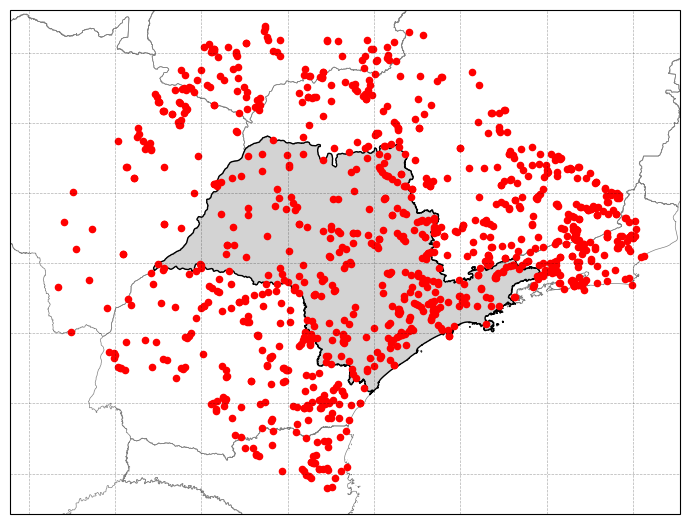

In [101]:
# Example of how to call the function
years = range(2008, 2024)
plot_station_locations_all(filtered_df_stations, years)

In [ ]:
# Function to create a dictionary with 'codFenomeno' as key and 'nome' as value
def create_codFenomeno_nome_dict(atributos):
    cod_fenomeno_nome_dict = {}  # Initialize the dictionary
    for classe, fenomenos in atributos.items():
        for fenomeno in fenomenos:
            cod_fenomeno = fenomeno['codFenomeno']
            nome = fenomeno['nome']
            cod_fenomeno_nome_dict[cod_fenomeno] = nome  # Add to the dictionary
    return cod_fenomeno_nome_dict

# Create the dictionary
cod_fenomeno_nome_dict = create_codFenomeno_nome_dict(atributos)

# Print the result
cod_fenomeno_nome_dict

In [102]:
variables_fenomeno = {'I175': 'PRECIPITACAO TOTAL, HORARIO',
 'I106': 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA',
 'I615': 'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)',
 'I616': 'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)',
 'I133': 'RADIACAO GLOBAL',
 'I101': 'TEMPERATURA DO AR - BULBO SECO, HORARIA',
 'I611': 'TEMPERATURA MAXIMA NA HORA ANT. (AUT)',
 'I612': 'TEMPERATURA MINIMA NA HORA ANT. (AUT)',
 'I617': 'UMIDADE REL. MAX. NA HORA ANT. (AUT)',
 'I618': 'UMIDADE REL. MIN. NA HORA ANT. (AUT)',
 'I105': 'UMIDADE RELATIVA DO AR, HORARIA',
 'I608': 'VENTO, RAJADA MAXIMA',
 'I111': 'VENTO, VELOCIDADE HORARIA'}

In [110]:
import pandas as pd
import os
import time
import logging

# Set up logging for error handling
logging.basicConfig(filename='fenomeno_error_log.txt', level=logging.ERROR,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Define the maximum number of retries
MAX_RETRIES = 3
RETRY_DELAY = 10  # Delay between retries in seconds

# Function to attempt the API request and retry if necessary
def fetch_fenomeno_with_retry(cod_est, codigo, nome, retries=MAX_RETRIES):
    attempt = 0
    while attempt < retries:
        try:
            # Try to fetch the data
            fenomeno_data = get_fenomeno(cod_estacao=cod_est, cod_fenomeno=codigo, data_inicio='2008-01-01', data_final='2024-12-31')
            
            if fenomeno_data is not None:
                # If the data is valid, return it
                return fenomeno_data
            else:
                # If the data is None, log the error and retry
                logging.error(f"No data returned for {cod_est} - {codigo} - {nome}. Attempt {attempt + 1} of {retries}.")
        
        except Exception as e:
            # If an exception occurs (e.g., network error, timeout), log the error and retry
            logging.error(f"Error fetching data for {cod_est} - {codigo} - {nome}. Attempt {attempt + 1} of {retries}. Error: {str(e)}")
        
        # Wait before retrying
        time.sleep(RETRY_DELAY)
        attempt += 1
    
    # After retries, if no valid data is returned, return None
    logging.error(f"Failed to fetch data for {cod_est} - {codigo} - {nome} after {retries} attempts.")
    return None

# Iterate over each station in the filtered list of stations
for cod_est in filtered_df_stations['codEstacao']:
    
    # Directory where files will be saved
    output_dir = f'data/raw/{cod_est}'

    # Create the directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Create a list to collect the file paths for merging later
    file_paths = []

    # Iterate over the 'variables_fenomeno' dictionary to fetch data and save each phenomenon to a file
    for codigo, nome in variables_fenomeno.items():
        # Fetch the phenomenon data for the specific station and date range with retry
        fenomeno_data = fetch_fenomeno_with_retry(cod_est, codigo, nome)
        
        if fenomeno_data is not None:
            # Convert the fetched data into a DataFrame
            fenomeno_data_df = pd.DataFrame(fenomeno_data['data']['data'], columns=['HORA UTC', nome])

            # Convert the 'timestamp' column from milliseconds to a proper datetime
            fenomeno_data_df['HORA UTC'] = pd.to_datetime(fenomeno_data_df['HORA UTC'], unit='ms')

            # Save the phenomenon data to a CSV file
            file_path = os.path.join(output_dir, f'{cod_est}_{codigo}_{nome}.csv')
            fenomeno_data_df.to_csv(file_path, index=False)

            # Append the file path for later use
            file_paths.append(file_path)
        else:
            # If no data returned after retries, skip to the next phenomenon
            logging.error(f"Skipping {cod_est} - {codigo} - {nome} due to failed data fetch.")
            continue
    
    # List to hold all DataFrames
    data_frames = []

    # Read and process each file into DataFrames
    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)

            # Convert 'HORA UTC' column to datetime if it's not already
            if df['HORA UTC'].dtype == 'O':  # If 'HORA UTC' is a string
                df['HORA UTC'] = pd.to_datetime(df['HORA UTC'])

            # Set 'HORA UTC' as the index to align by time
            df.set_index('HORA UTC', inplace=True)
            
            # Add the DataFrame to the list
            data_frames.append(df)

        except Exception as e:
            logging.error(f"Error reading file {file_path}. Error: {str(e)}")
            continue

    # If no data was successfully processed, skip to the next station
    if not data_frames:
        logging.error(f"No valid data for station {cod_est}. Skipping to the next station.")
        continue

    # Extract the indices (timestamps) from each DataFrame and concatenate them as lists
    all_indices = pd.to_datetime(pd.concat([df.index.to_series() for df in data_frames]).unique())

    # Reindex all DataFrames to the union of all timestamps (outer join)
    aligned_data_frames = [df.reindex(all_indices) for df in data_frames]

    # Concatenate all DataFrames along the columns (axis=1)
    fenomeno = pd.concat(aligned_data_frames, axis=1)

    # Save the final DataFrame to a CSV file
    final_file_path = os.path.join(output_dir, f'{cod_est}_final.csv')
    fenomeno.to_csv(final_file_path, index=True)

    print(f"Final data for station {cod_est} saved to {final_file_path}")


KeyboardInterrupt: 